**Abstract.**

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

# Table of Contents

# Feature Importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:

* Better understanding the data.
* Better understanding a model.
* Reducing the number of input features.

Feature importance scores can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

Feature importance scores can provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

Feature importance can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

> Often, we desire to quantify the strength of the relationship between the predictors and the outcome. […] Ranking predictors in this manner can be very useful when sifting through large amounts of data.

(pp. 463, [KJ18])

Feature importance scores can be fed to a wrapper model, such as the `SelectFromModel` class, to perform feature selection.

There are many ways to calculate feature importance scores and many models that can be used for this purpose.

Perhaps the simplest way is to calculate simple coefficient statistics between each feature and the target variable. For more on this approach, see the tutorial:

How to Choose a Feature Selection Method for Machine Learning

In this tutorial, we will look at three main types of more advanced feature importance; they are:

* Feature importance from model coefficients.
* Feature importance from decision trees.
* Feature importance from permutation testing.

Let’s take a closer look at each.

# Datasets

Next, let’s define some test datasets that we can use as the basis for demonstrating and exploring feature importance scores.

Each test problem has five important and five unimportant features, and it may be interesting to see which methods are consistent at finding or differentiating the features based on their importance.

## Classification Dataset

We will use the `make_classification()` function to create a test binary classification dataset.

The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant. We will fix the random number seed to ensure we get the same examples each time the code is run.

An example of creating and summarizing the dataset is listed below.

In [16]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X_clf.shape, y_clf.shape)

(1000, 10) (1000,)


## Regression Dataset

We will use the `make_regression()` function to create a test regression dataset.

Like the classification dataset, the regression dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five that will be redundant.

In [17]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X_reg.shape, y_reg.shape)

(1000, 10) (1000,)


# Coefficients as Feature Importance

Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Examples include linear regression, logistic regression, and extensions that add regularization, such as ridge regression and the elastic net.

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

Let’s take a closer look at using coefficients as feature importance for classification and regression. We will fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and finally create a bar chart to get an idea of the relative importance of the features.

## Linear Regression Feature Importance

We can fit a LinearRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

The complete example of linear regression coefficients for feature importance is listed below.

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


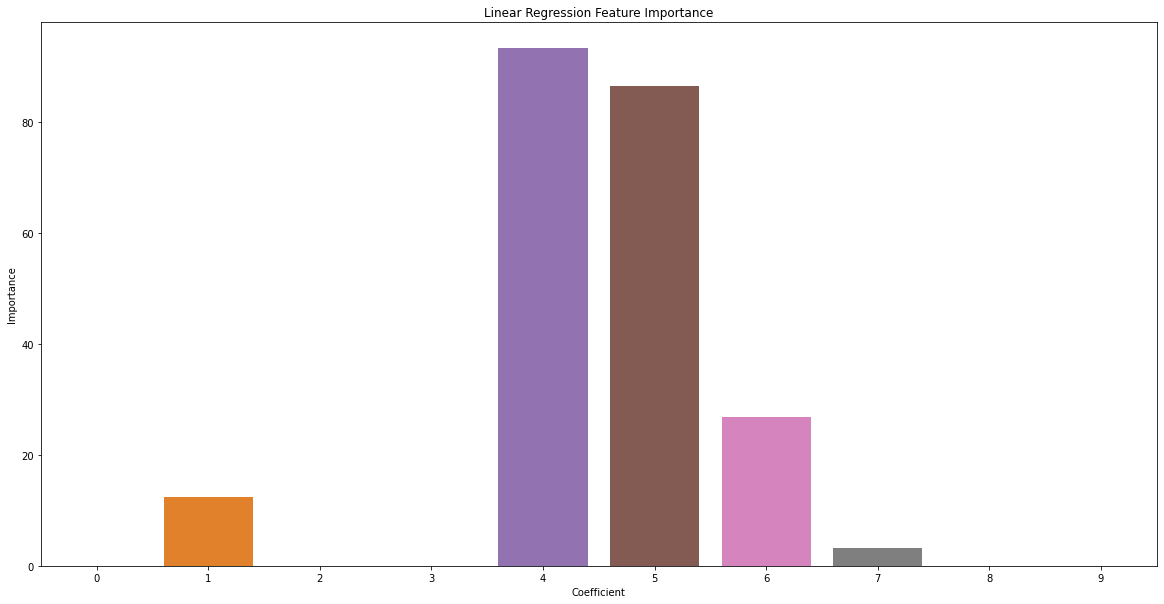

In [39]:
# linear regression feature importance

from sklearn.linear_model import LinearRegression

# define the model
lr = LinearRegression()
# fit the model
lr.fit(X_reg, y_reg)
# get importance
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[x for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Linear Regression Feature Importance", xlabel="Coefficient", ylabel="Importance");

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The scores suggest that the model found the five important features and marked all other features with a zero coefficient, essentially removing them from the model.

## Logistic Regression Feature Importance

We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

The complete example of logistic regression coefficients for feature importance is listed below.

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


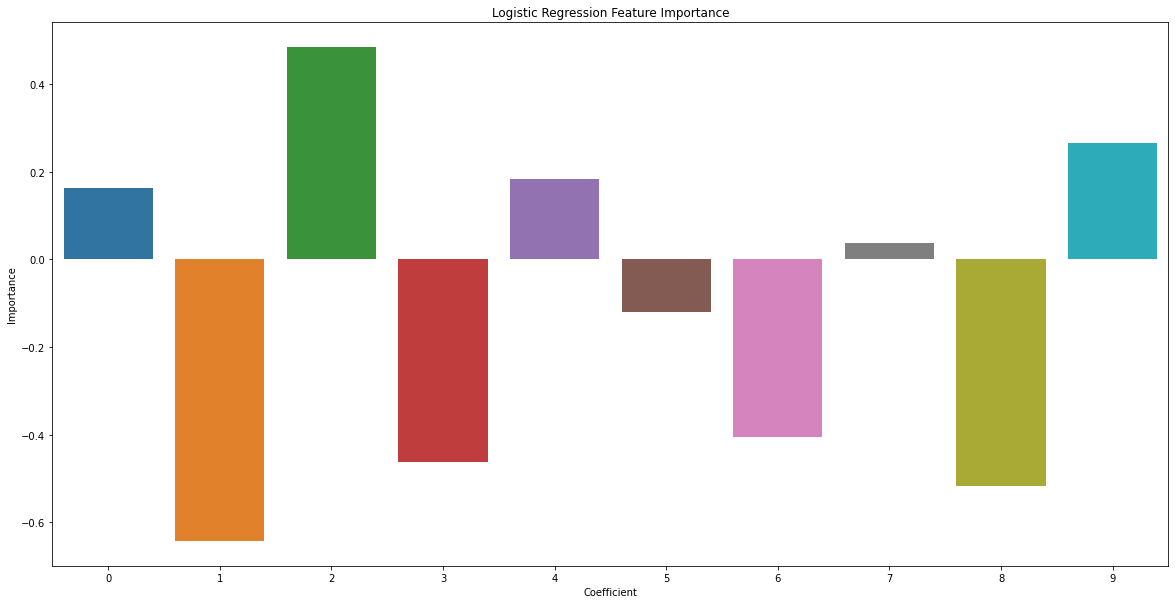

In [40]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
# define dataset
clf = LogisticRegression()
# fit the model
clf.fit(X_clf, y_clf)
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[x for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Logistic Regression Feature Importance", xlabel="Coefficient", ylabel="Importance");

No clear pattern of important and unimportant features can be identified from these results, at least from what I can tell.

# Decision Tree Feature Importance

Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

Let’s take a look at a worked example of each.

## CART Feature Importance

We can use the CART algorithm for feature importance implemented in scikit-learn as the `DecisionTreeRegressor` and `DecisionTreeClassifier` classes.

After being fit, the model provides a `feature_importances_` property that can be accessed to retrieve the relative importance scores for each input feature.

Let’s take a look at an example of this for regression and classification.
CART Regression Feature Importance

The complete example of fitting a DecisionTreeRegressor and summarizing the calculated feature importance scores is listed below.

In [41]:
from sklearn.tree import DecisionTreeRegressor
# define the model
dtr = DecisionTreeRegressor()
# fit the model
dtr.fit(X_reg, y_reg)
# get importance
importance = dtr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00224
Feature: 1, Score: 0.00423
Feature: 2, Score: 0.00240
Feature: 3, Score: 0.00145
Feature: 4, Score: 0.51717
Feature: 5, Score: 0.43826
Feature: 6, Score: 0.02696
Feature: 7, Score: 0.00275
Feature: 8, Score: 0.00335
Feature: 9, Score: 0.00120


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps three of the 10 features as being important to prediction.

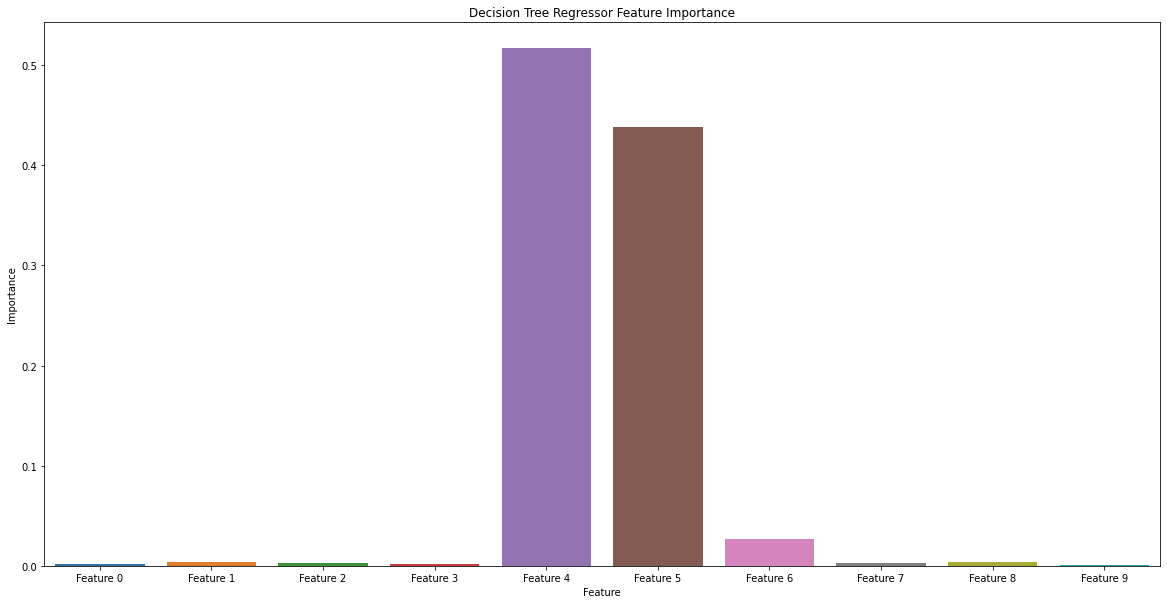

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Decision Tree Regressor Feature Importance", xlabel="Feature", ylabel="Importance");

## CART Classification Feature Importance

The complete example of fitting a `DecisionTreeClassifier` and summarizing the calculated feature importance scores is listed below.

In [46]:
from sklearn.tree import DecisionTreeClassifier

# define the model
dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_clf, y_clf)
# get importance
importance = dtc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01654
Feature: 1, Score: 0.01766
Feature: 2, Score: 0.18824
Feature: 3, Score: 0.30793
Feature: 4, Score: 0.09351
Feature: 5, Score: 0.01898
Feature: 6, Score: 0.17503
Feature: 7, Score: 0.03224
Feature: 8, Score: 0.12437
Feature: 9, Score: 0.02551


Running the example fits the model, then reports the coefficient value for each feature.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps four of the 10 features as being important to prediction.

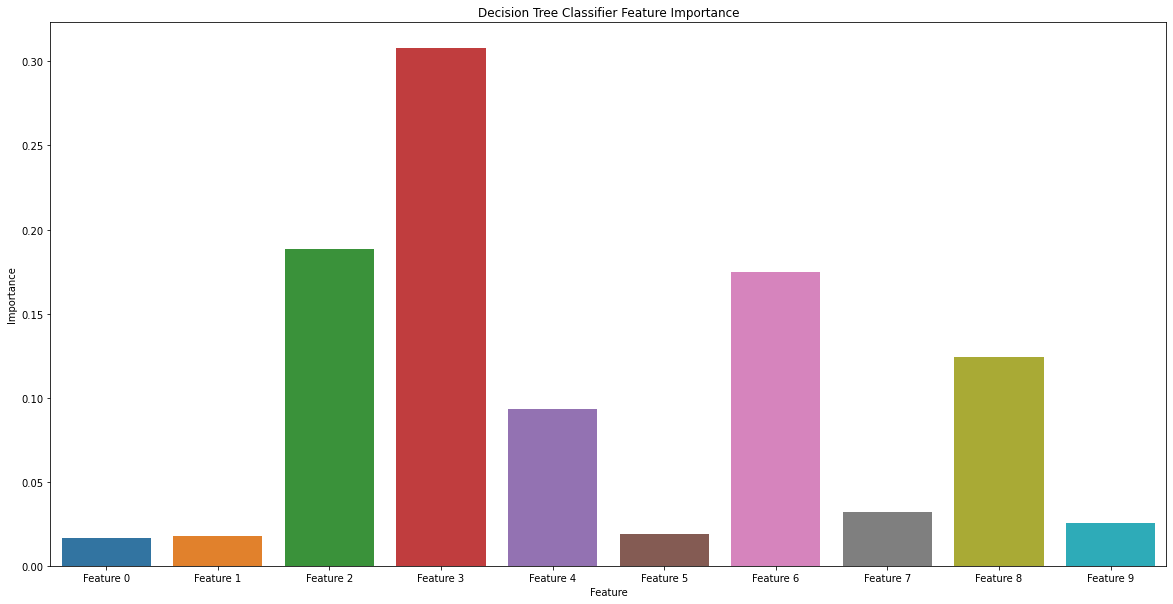

In [47]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Decision Tree Classifier Feature Importance", xlabel="Feature", ylabel="Importance");

## Random Forest Feature Importance

We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the `RandomForestRegressor` and `RandomForestClassifier` classes.

After being fit, the model provides a `feature_importances_` property that can be accessed to retrieve the relative importance scores for each input feature.

This approach can also be used with the bagging and extra trees algorithms.

Let’s take a look at an example of this for regression and classification.

### Random Forest Regression Feature Importance

The complete example of fitting a `RandomForestRegressor` and summarizing the calculated feature importance scores is listed below.

In [50]:
from sklearn.ensemble import RandomForestRegressor

# define the model
rfr = RandomForestRegressor()
# fit the model
rfr.fit(X_reg, y_reg)
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00280
Feature: 1, Score: 0.00587
Feature: 2, Score: 0.00295
Feature: 3, Score: 0.00284
Feature: 4, Score: 0.53015
Feature: 5, Score: 0.42124
Feature: 6, Score: 0.02560
Feature: 7, Score: 0.00276
Feature: 8, Score: 0.00297
Feature: 9, Score: 0.00281


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps two or three of the 10 features as being important to prediction.

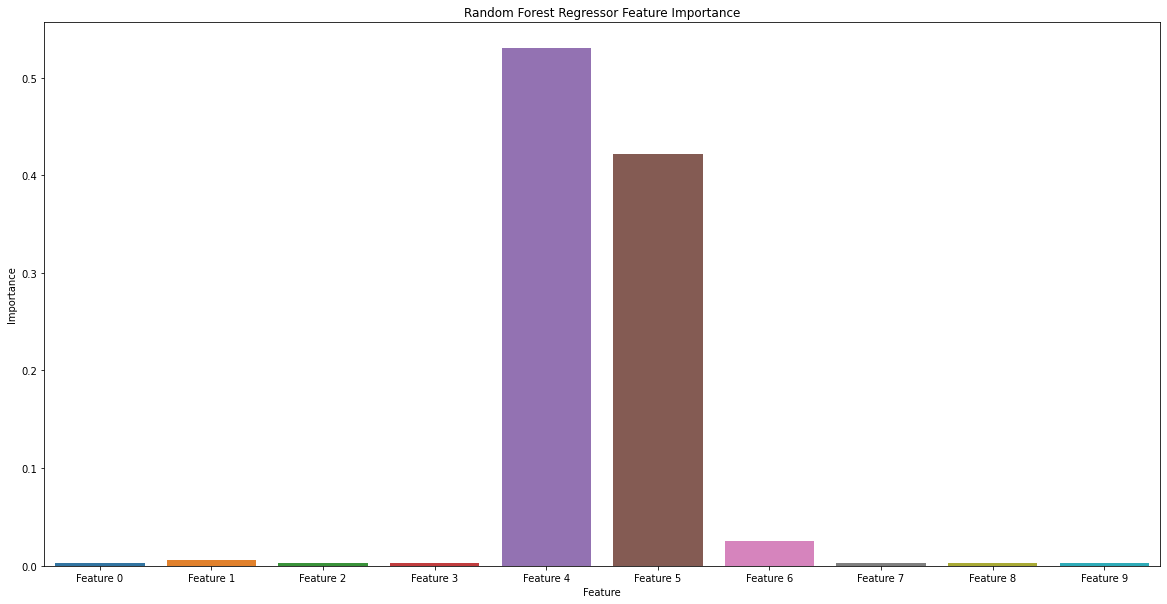

In [51]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Random Forest Regressor Feature Importance", xlabel="Feature", ylabel="Importance");

### Random Forest Classification Feature Importance

In [58]:
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_clf, y_clf)

RandomForestClassifier()

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps two or three of the 10 features as being important to prediction.

In [59]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06419
Feature: 1, Score: 0.10976
Feature: 2, Score: 0.17085
Feature: 3, Score: 0.16266
Feature: 4, Score: 0.08200
Feature: 5, Score: 0.13222
Feature: 6, Score: 0.10122
Feature: 7, Score: 0.05441
Feature: 8, Score: 0.08076
Feature: 9, Score: 0.04192


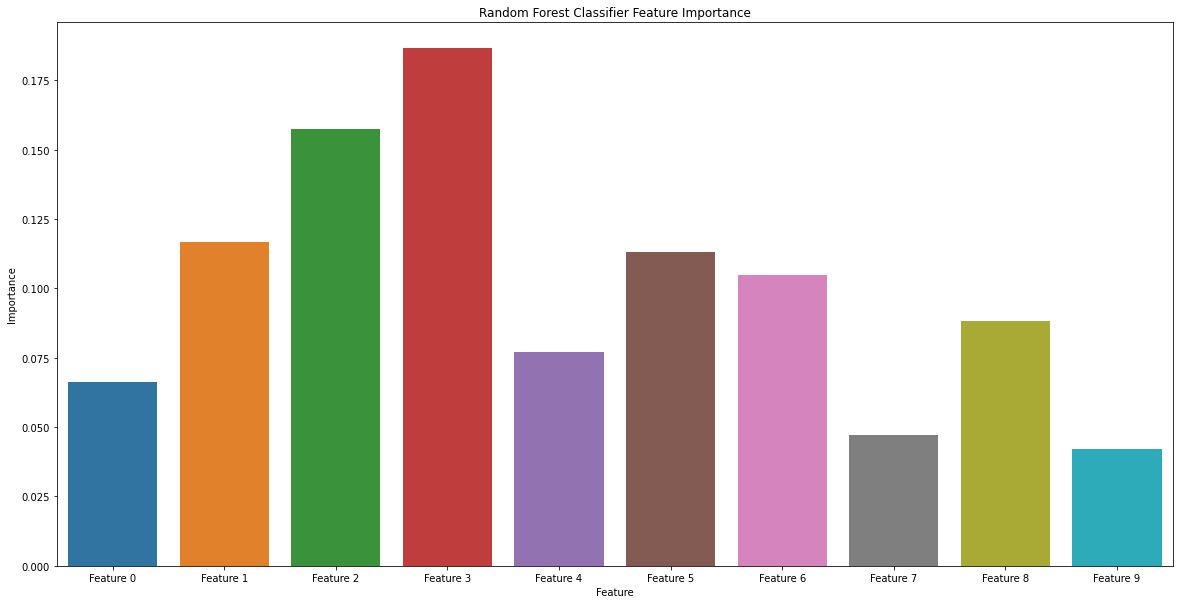

In [57]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Random Forest Classifier Feature Importance", xlabel="Feature", ylabel="Importance");

## XGBoost Feature Importance

XGBoost is a library that provides an efficient and effective implementation of the stochastic gradient boosting algorithm.

This algorithm can be used with scikit-learn via the `XGBRegressor` and `XGBClassifier` classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

This algorithm is also provided via scikit-learn via the GradientBoostingClassifier and GradientBoostingRegressor classes and the same approach to feature selection can be used.

### XGBoost Regression Feature Importance

In [62]:
from xgboost import XGBRegressor

# define the model
model = XGBRegressor()
# fit the model
model.fit(X_reg, y_reg)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps two or three of the 10 features as being important to prediction.

In [63]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00039
Feature: 1, Score: 0.00583
Feature: 2, Score: 0.00112
Feature: 3, Score: 0.00129
Feature: 4, Score: 0.49502
Feature: 5, Score: 0.46443
Feature: 6, Score: 0.02951
Feature: 7, Score: 0.00086
Feature: 8, Score: 0.00075
Feature: 9, Score: 0.00079


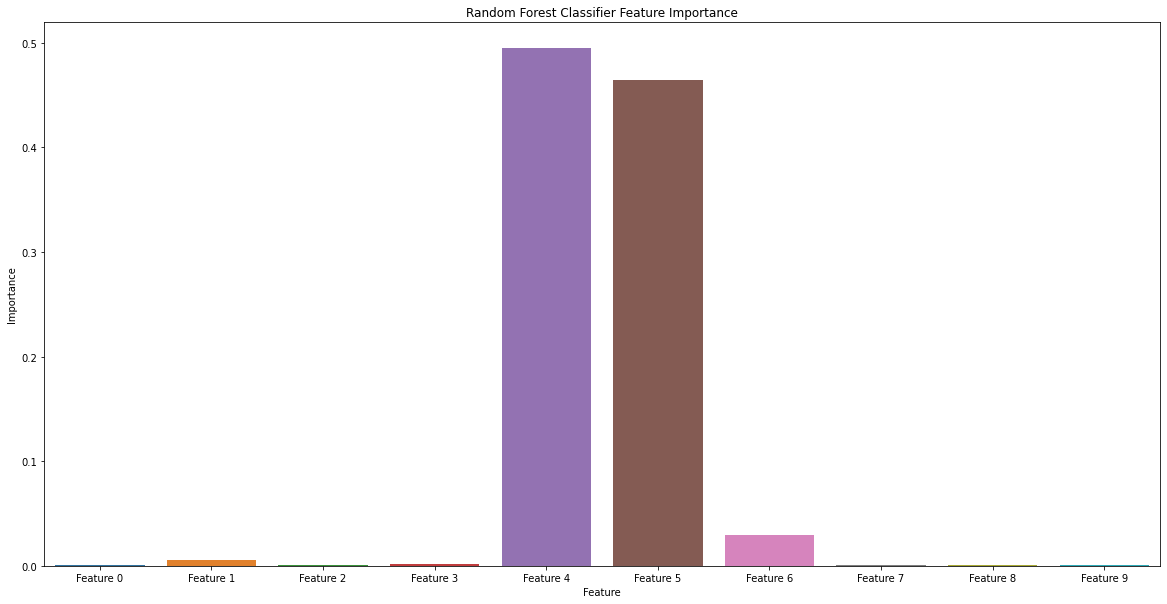

In [64]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Random Forest Classifier Feature Importance", xlabel="Feature", ylabel="Importance");

### XGBoost Classification Feature Importance

In [65]:
from xgboost import XGBClassifier

# define the model
model = XGBClassifier()
# fit the model
model.fit(X_clf, y_clf)

/home/vscode/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps seven of the 10 features as being important to prediction.

In [67]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03723
Feature: 1, Score: 0.07725
Feature: 2, Score: 0.12537
Feature: 3, Score: 0.29666
Feature: 4, Score: 0.10099
Feature: 5, Score: 0.05706
Feature: 6, Score: 0.13027
Feature: 7, Score: 0.03537
Feature: 8, Score: 0.11694
Feature: 9, Score: 0.02285


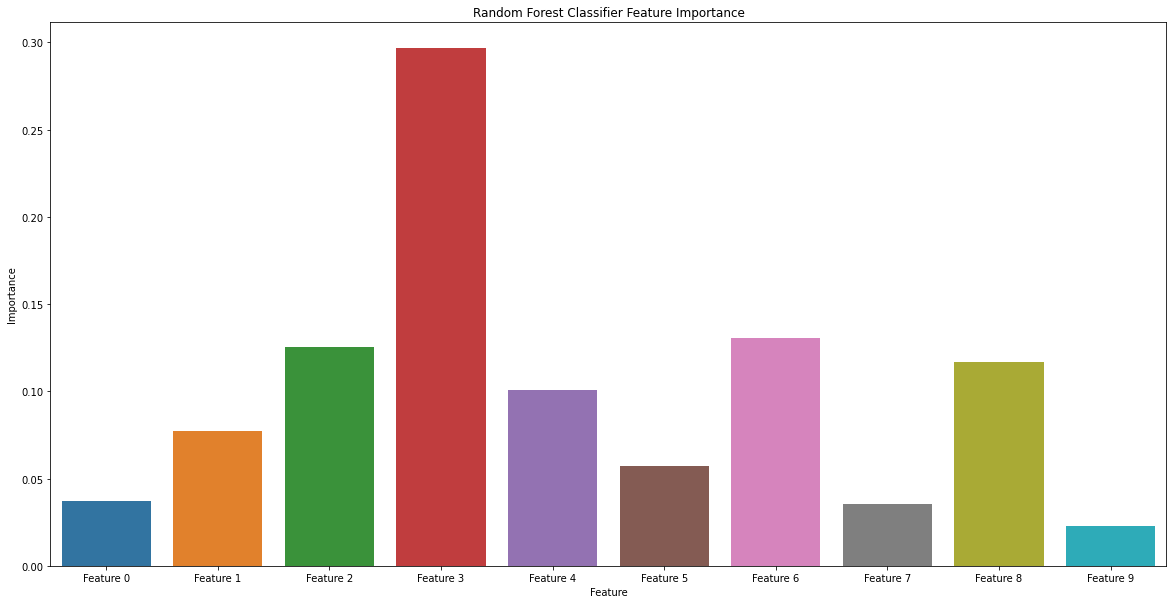

In [68]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Random Forest Classifier Feature Importance", xlabel="Feature", ylabel="Importance");

# Permutation Feature Importance

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.

Permutation feature selection can be used via the permutation_importance() function that takes a fit model, a dataset (train or test dataset is fine), and a scoring function.

Let’s take a look at this approach to feature selection with an algorithm that does not support feature selection natively, specifically k-nearest neighbors.

In [76]:
from sklearn.inspection import permutation_importance


## Permutation Feature Importance for Regression

The complete example of fitting a KNeighborsRegressor and summarizing the calculated permutation feature importance scores is listed below.

In [77]:
from sklearn.neighbors import KNeighborsRegressor

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X_reg, y_reg)

KNeighborsRegressor()

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps two or three of the 10 features as being important to prediction.

In [72]:
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 165.96609
Feature: 1, Score: 307.93855
Feature: 2, Score: 136.23459
Feature: 3, Score: 57.90714
Feature: 4, Score: 9748.88384
Feature: 5, Score: 7888.97636
Feature: 6, Score: 923.55297
Feature: 7, Score: 155.37267
Feature: 8, Score: 148.20936
Feature: 9, Score: 131.14741


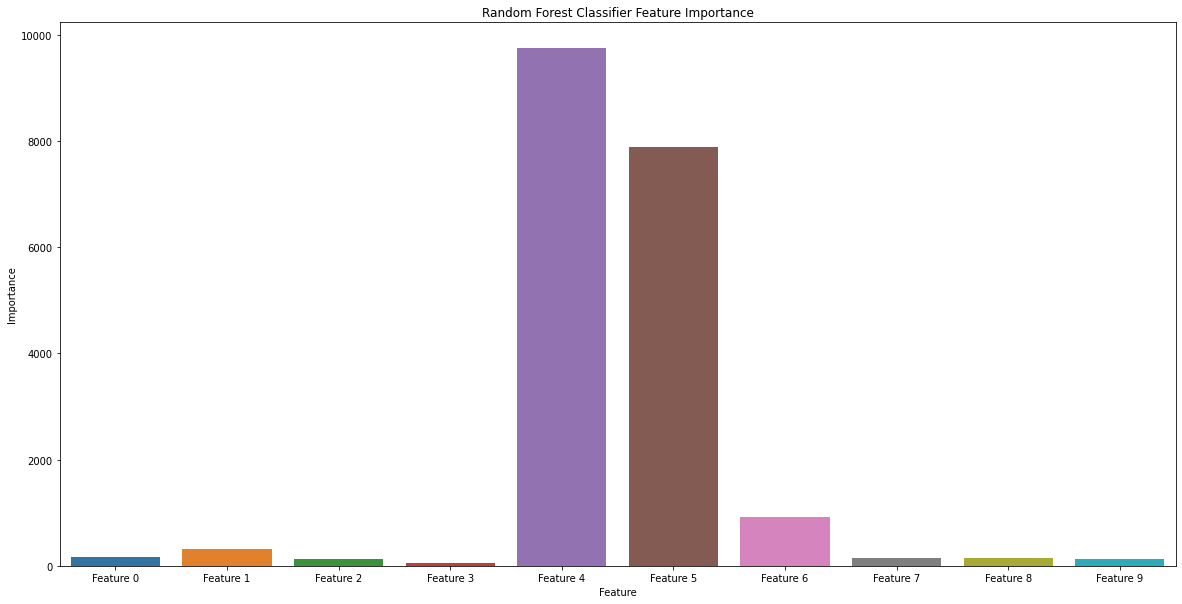

In [73]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="Random Forest Classifier Feature Importance", xlabel="Feature", ylabel="Importance");

## Permutation Feature Importance for Classification

In [78]:
from sklearn.neighbors import KNeighborsClassifier

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_clf, y_clf)

KNeighborsClassifier()

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

The results suggest perhaps two or three of the 10 features as being important to prediction.

In [79]:
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1.19560
Feature: 1, Score: -2.28706
Feature: 2, Score: -0.87561
Feature: 3, Score: -0.77011
Feature: 4, Score: 8.39293
Feature: 5, Score: 1.05189
Feature: 6, Score: -2.52574
Feature: 7, Score: 0.23474
Feature: 8, Score: 0.35355
Feature: 9, Score: 1.12406


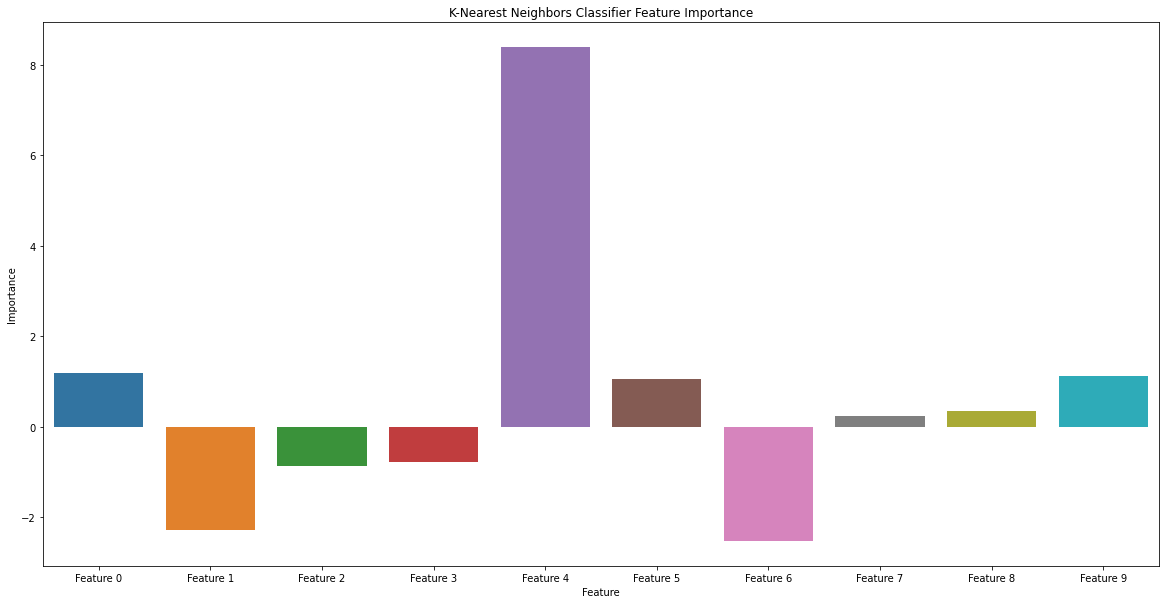

In [81]:
# plot feature importance
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=[f"Feature {x}" for x in range(len(importance))], y=importance, ax=ax)
ax.set(title="K-Nearest Neighbors Classifier Feature Importance", xlabel="Feature", ylabel="Importance");

# Feature Selection with Importance

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.

We can demonstrate this with a small example.

Recall, our synthetic dataset has 1,000 examples each with 10 input variables, five of which are redundant and five of which are important to the outcome. We can use feature importance scores to help select the five variables that are relevant and only use them as inputs to a predictive model.

First, we can split the training dataset into train and test sets and train a model on the training dataset, make predictions on the test set and evaluate the result using classification accuracy. We will use a logistic regression model as the predictive model.

This provides a baseline for comparison when we remove some features using feature importance scores.

The complete example of evaluating a logistic regression model using all features as input on our synthetic dataset is listed below.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


Running the example first the logistic regression model on the training dataset and evaluates it on the test set.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case we can see that the model achieved the classification accuracy of about 84.55 percent using all features in the dataset.

Given that we created the dataset, we would expect better or the same results with half the number of input variables.

We could use any of the feature importance scores explored above, but in this case we will use the feature importance scores provided by random forest.

We can use the SelectFromModel class to define both the model we wish to calculate importance scores, RandomForestClassifier in this case, and the number of features to select, 5 in this case.

In [87]:
from sklearn.feature_selection import SelectFromModel
# configure to select a subset of features
fs = SelectFromModel(RandomForestClassifier(n_estimators=200), max_features=5)

We can fit the feature selection method on the training dataset.

This will calculate the importance scores that can be used to rank all input features. We can then apply the method as a transform to select a subset of 5 most important features from the dataset. This transform will be applied to the training dataset and the test set.

# References

[1] https://machinelearningmastery.com/calculate-feature-importance-with-python/

## Tutorials

[1] [How to Calculate Feature Importance With Python](https://machinelearningmastery.com/calculate-feature-importance-with-python/)

[2] [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

[3] [How to Perform Feature Selection with Categorical Data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)

[4] [Feature Importance and Feature Selection With XGBoost in Python](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)

[5] [Feature Selection For Machine Learning in Python](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

[6] A[n Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)

## Books

[KJ18] Kuhn, M. and Johnson, K., "Applied Predictive Modeling", Springer, 1st ed., 2018

In [61]:
%load_ext watermark
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sun Aug 29 2021

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.25.0

seaborn   : 0.11.1
matplotlib: 3.4.2
xgboost   : 1.4.2
sklearn   : 0.23.2
sys       : 3.9.6 (default, Jul 22 2021, 15:24:21) 
[GCC 8.3.0]

Watermark: 2.2.0

